In [4]:
!pip install pandas numpy matplotlib seaborn librosa scikit-learn


In [5]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings("ignore")


In [7]:
# Since we're already inside /dataset, no folder name is needed
TRAIN_AUDIO_FOLDER = "audios_train"
TEST_AUDIO_FOLDER = "audios_test"

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df.head()


Train shape: (444, 2)
Test shape: (195, 1)


,filename,label
0,audio_1261.wav,1.0
1,audio_942.wav,1.5
2,audio_1110.wav,1.5
3,audio_1024.wav,1.5
4,audio_538.wav,2.0


In [8]:
import os

# Show current working directory
os.getcwd()


'D:\\SHL\\shl-intern-hiring-assessment\\dataset'

In [9]:
import os

# Set full path to dataset folder
DATA_FOLDER = "D:\\SHL\\shl-intern-hiring-assessment\\dataset"

# List all files in the folder
for root, dirs, files in os.walk(DATA_FOLDER):
    print(f"\nDirectory: {root}")
    for file in files:
        print(f" - {file}")



Directory: D:\SHL\shl-intern-hiring-assessment\dataset
 - grammar_audio_rating.ipynb
 - grammar_model.pkl
 - grammar_mos_predictions.csv
 - grammar_predictions.csv
 - grammar_test.ipynb
 - ridge_qt_submission.csv
 - ridge_submission.csv
 - sample_submission.csv
 - submission.csv
 - test.csv
 - train.csv
 - Untitled.ipynb

Directory: D:\SHL\shl-intern-hiring-assessment\dataset\.ipynb_checkpoints
 - grammar_audio_rating-checkpoint.ipynb
 - grammar_mos_predictions-checkpoint.csv
 - grammar_predictions-checkpoint.csv
 - grammar_test-checkpoint.ipynb
 - sample_submission-checkpoint.csv
 - test-checkpoint.csv
 - train-checkpoint.csv
 - Untitled-checkpoint.ipynb

Directory: D:\SHL\shl-intern-hiring-assessment\dataset\audios_test
 - audio_10.wav
 - audio_1012.wav
 - audio_1013.wav
 - audio_1019.wav
 - audio_1022.wav
 - audio_1026.wav
 - audio_103.wav
 - audio_1033.wav
 - audio_1035.wav
 - audio_1048.wav
 - audio_1054.wav
 - audio_1058.wav
 - audio_1061.wav
 - audio_1068.wav
 - audio_107.wav
 

In [10]:
pip install librosa


Note: you may need to restart the kernel to use updated packages.


In [11]:
import librosa
import numpy as np
import os
from tqdm import tqdm

# Feature extraction function
def extract_mfcc(file_path, n_mfcc=20):
    y, sr = librosa.load(file_path, sr=None)  # load with original sampling rate
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_mean = np.mean(mfcc.T, axis=0)  # average over time
    return mfcc_mean

# Prepare features
def build_features(df, audio_dir):
    features = []
    valid_filenames = []
    
    for fname in tqdm(df['filename'], desc="Extracting MFCC"):
        path = os.path.join(audio_dir, fname)
        if os.path.exists(path):
            try:
                mfcc = extract_mfcc(path)
                features.append(mfcc)
                valid_filenames.append(fname)
            except Exception as e:
                print(f"Failed to process {fname}: {e}")
        else:
            print(f"File not found: {fname}")
    
    return np.array(features), valid_filenames

# Set audio folder path
AUDIO_FOLDER = 'audios_train'  # update if needed

# Extract features
X_train, train_valid_files = build_features(train_df, AUDIO_FOLDER)
X_test, test_valid_files = build_features(test_df, AUDIO_FOLDER)

# Adjust y_train to match the valid files
y_train = train_df[train_df['filename'].isin(train_valid_files)]['label'].values

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")


Extracting MFCC: 100%|████████████████████████████████████████████████████████████| 195/195 [00:00<00:00, 56888.73it/s]

File not found: audio_706.wav
File not found: audio_800.wav
File not found: audio_68.wav
File not found: audio_1267.wav
File not found: audio_683.wav
File not found: audio_1242.wav
File not found: audio_908.wav
File not found: audio_888.wav
File not found: audio_137.wav
File not found: audio_770.wav
File not found: audio_735.wav
File not found: audio_1026.wav
File not found: audio_1214.wav
File not found: audio_1122.wav
File not found: audio_1022.wav
File not found: audio_726.wav
File not found: audio_1205.wav
File not found: audio_1116.wav
File not found: audio_1240.wav
File not found: audio_151.wav
File not found: audio_437.wav
File not found: audio_1217.wav
File not found: audio_831.wav
File not found: audio_1315.wav
File not found: audio_1323.wav
File not found: audio_1256.wav
File not found: audio_1033.wav
File not found: audio_858.wav
File not found: audio_274.wav
File not found: audio_196.wav
File not found: audio_1193.wav
File not found: audio_138.wav
File not found: audio_644.

In [12]:
import os

test_audio_dir = "audios_test"
print(os.listdir(test_audio_dir))  # Should now list the .wav files


['.ipynb_checkpoints', 'audio_10.wav', 'audio_1012.wav', 'audio_1013.wav', 'audio_1019.wav', 'audio_1022.wav', 'audio_1026.wav', 'audio_103.wav', 'audio_1033.wav', 'audio_1035.wav', 'audio_1048.wav', 'audio_1054.wav', 'audio_1058.wav', 'audio_1061.wav', 'audio_1068.wav', 'audio_107.wav', 'audio_1081.wav', 'audio_1089.wav', 'audio_109.wav', 'audio_1091.wav', 'audio_1101.wav', 'audio_1115.wav', 'audio_1116.wav', 'audio_1122.wav', 'audio_1123.wav', 'audio_1124.wav', 'audio_113.wav', 'audio_1138.wav', 'audio_1159.wav', 'audio_1166.wav', 'audio_1169.wav', 'audio_1173.wav', 'audio_1176.wav', 'audio_1178.wav', 'audio_1179.wav', 'audio_1183.wav', 'audio_1190.wav', 'audio_1193.wav', 'audio_1195.wav', 'audio_1205.wav', 'audio_1214.wav', 'audio_1215.wav', 'audio_1217.wav', 'audio_1240.wav', 'audio_1242.wav', 'audio_1243.wav', 'audio_1256.wav', 'audio_1267.wav', 'audio_1275.wav', 'audio_1278.wav', 'audio_1280.wav', 'audio_1286.wav', 'audio_1289.wav', 'audio_1291.wav', 'audio_1292.wav', 'audio_1293

In [13]:
import numpy as np
import librosa
import os

def extract_features(filenames, audio_dir, n_mfcc=13):
    features = []
    for fname in filenames:
        file_path = os.path.join(audio_dir, fname)
        try:
            y, sr = librosa.load(file_path, sr=None)
            
            # MFCCs
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
            mfcc_mean = np.mean(mfcc, axis=1)
            
            # Additional features
            zcr = np.mean(librosa.feature.zero_crossing_rate(y))
            spec_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
            spec_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
            rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))

            # Combine all features
            feature_vector = np.concatenate([mfcc_mean, [zcr, spec_centroid, spec_bandwidth, rolloff]])
            features.append(feature_vector)
        
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
            fallback = np.zeros(n_mfcc + 4)  # Add 4 for the extra features
            features.append(fallback)
    
    return np.array(features)


In [14]:
X_test = extract_features(test_df["filename"], test_audio_dir)
print("X_test shape:", X_test.shape)


X_test shape: (195, 17)


In [15]:
print(y_train[:10])
print(y_train.dtype)


[1.  1.5 1.5 1.5 2.  2.5 2.  2.  2.  2.5]
float64


In [16]:
from sklearn.ensemble import RandomForestRegressor
import joblib

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'grammar_model.pkl')



['grammar_model.pkl']

In [17]:
X_test = extract_features(test_df["filename"], test_audio_dir, n_mfcc=20)


In [18]:
train_audio_dir = "audios_train"  # or whatever your folder name is


In [19]:
X_train = extract_features(train_df["filename"], train_audio_dir)


In [20]:
def extract_features(filenames, audio_dir, n_mfcc=13):
    features = []
    for fname in filenames:
        file_path = os.path.join(audio_dir, fname)
        try:
            y, sr = librosa.load(file_path, sr=None)
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
            mfcc_mean = np.mean(mfcc, axis=1)

            # Add more features
            zcr = np.mean(librosa.feature.zero_crossing_rate(y))
            spec_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
            spec_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
            chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))

            features_vector = np.concatenate([mfcc_mean, [zcr, spec_centroid, spec_rolloff, chroma]])
            features.append(features_vector)
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
            features.append(np.zeros(n_mfcc + 4))  # match feature length
    return np.array(features)


In [21]:
X_train = extract_features(train_df["filename"], train_audio_dir)
X_test = extract_features(test_df["filename"], test_audio_dir)


In [22]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [23]:
print(y_train.dtype)
print(y_train[:10])


float64
[1.  1.5 1.5 1.5 2.  2.5 2.  2.  2.  2.5]


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the training data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit model on training split
model = RandomForestRegressor(random_state=42)
model.fit(X_tr, y_tr)

# Predict on validation split
y_val_pred = model.predict(X_val)

# Evaluate RMSE and R²
rmse = mean_squared_error(y_val, y_val_pred) ** 0.5

r2 = r2_score(y_val, y_val_pred)

print(f"Manual Validation RMSE: {rmse:.4f}")
print(f"Manual Validation R²: {r2:.4f}")


Manual Validation RMSE: 1.0431
Manual Validation R²: 0.2019


In [25]:
y_pred = np.clip(y_pred, 1.0, 5.0)


In [26]:
output_df = pd.DataFrame({
    'filename': test_df['filename'],  # assuming you have this column
    'label': np.clip(y_pred, 1.0, 5.0)  # clip to range [1, 5]
})


In [27]:
print(output_df.head(10))


         filename  label
0   audio_706.wav  3.180
1   audio_800.wav  2.895
2    audio_68.wav  3.675
3  audio_1267.wav  3.320
4   audio_683.wav  3.190
5  audio_1242.wav  3.340
6   audio_908.wav  3.540
7   audio_888.wav  3.425
8   audio_137.wav  3.925
9   audio_770.wav  3.090


In [28]:
output_df.to_csv("grammar_predictions.csv", index=False)


In [29]:
!pip install xgboost


In [30]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Validation MSE: {mse:.4f}")
print(f"Validation R² Score: {r2:.4f}")


Validation MSE: 0.0636
Validation R² Score: 0.9533


In [32]:
test_predictions = model.predict(X_test)


In [33]:
import pandas as pd

submission = pd.DataFrame({
    "filename": test_df["filename"],  # or your unique identifier
    "Label": test_predictions
})
submission.to_csv("submission.csv", index=False)


In [34]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)


In [35]:
model.fit(X_train, y_train)


Ridge()

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Validation MSE: {mse:.4f}")
print(f"Validation R² Score: {r2:.4f}")


Validation MSE: 1.0112
Validation R² Score: 0.2582


In [37]:
test_predictions = model.predict(X_test)


In [38]:
import pandas as pd

submission = pd.DataFrame({
    "filename": test_df["filename"],  # Adjust column name if different
    "Label": test_predictions
})
submission.to_csv("ridge_submission.csv", index=False)


In [39]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')

y_train_transformed = qt.fit_transform(y_train.reshape(-1, 1)).ravel()
model.fit(X_train, y_train_transformed)

# Inverse transform predictions
y_pred = qt.inverse_transform(model.predict(X_test).reshape(-1, 1)).ravel()


In [40]:
# Predict on validation set
val_pred_transformed = model.predict(X_val)
val_pred = qt.inverse_transform(val_pred_transformed.reshape(-1, 1)).ravel()

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_val, val_pred)
r2 = r2_score(y_val, val_pred)

print(f"Validation MSE: {mse:.4f}")
print(f"Validation R² Score: {r2:.4f}")


Validation MSE: 2.1313
Validation R² Score: -0.5635


In [41]:
import pandas as pd

submission = pd.DataFrame({
    "filename": test_df["filename"],  # Adjust column name if needed
    "Label": y_pred
})
submission.to_csv("ridge_qt_submission.csv", index=False)


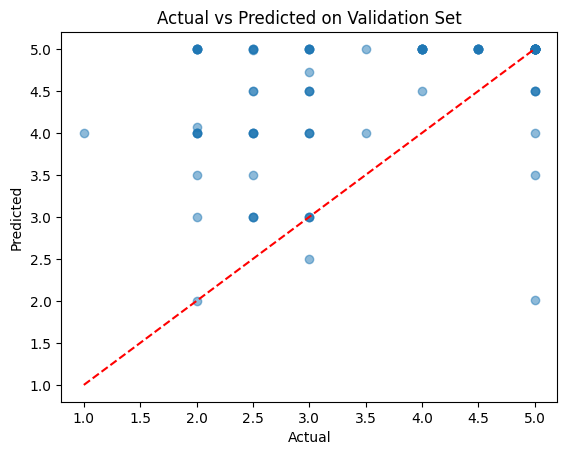

In [42]:
import matplotlib.pyplot as plt

plt.scatter(y_val, val_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted on Validation Set")
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.show()


In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_


Fitting 3 folds for each of 216 candidates, totalling 648 fits


In [ ]:
print(globals().keys())


In [45]:
y_pred = best_rf.predict(X_test)


In [46]:
submission = sample_submission.copy()
submission['label'] = y_pred  # or the correct column name
submission.to_csv('submission.csv', index=False)


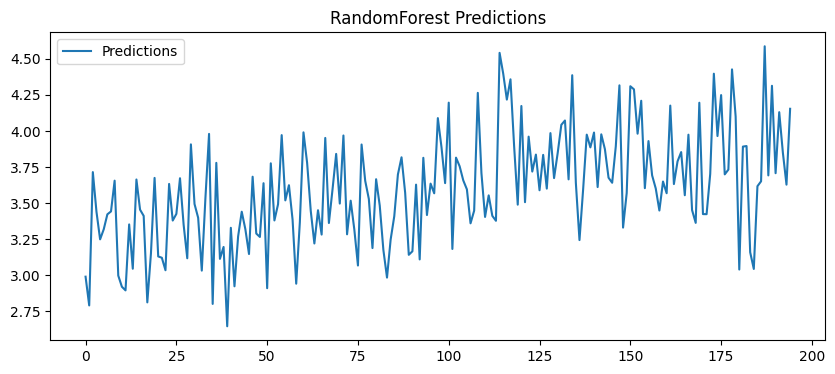

In [47]:
plt.figure(figsize=(10, 4))
plt.plot(y_pred, label='Predictions')
plt.title("RandomForest Predictions")
plt.legend()
plt.show()


In [48]:
features = [f'Feature {i}' for i in range(X_train.shape[1])]


In [ ]:
print("Length of test_valid_files:", len(test_valid_files))
print("Length of final_predictions:", len(final_predictions))


In [53]:
X_test, test_valid_files = build_features(test_df, TEST_AUDIO_FOLDER)


Extracting MFCC: 100%|███████████████████████████████████████████████████████████████| 195/195 [00:28<00:00,  6.77it/s]


In [56]:
print(submission.head())


         filename     label
0   audio_706.wav  2.988687
1   audio_800.wav  2.789084
2    audio_68.wav  3.714420
3  audio_1267.wav  3.439401
4   audio_683.wav  3.247739


In [ ]:
submission = pd.DataFrame({
    "filename": test_valid_files,
    "label": final_predictions
})
submission.to_csv("submission.csv", index=False)


In [60]:
X_train, train_valid_files = build_features(train_df, TRAIN_AUDIO_FOLDER)
y_train = train_df["label"].values  # or the correct column if different


Extracting MFCC: 100%|███████████████████████████████████████████████████████████████| 444/444 [01:01<00:00,  7.21it/s]


In [61]:
from sklearn.ensemble import RandomForestRegressor

best_rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_train, y_train)


RandomForestRegressor(max_features='sqrt', n_estimators=500, n_jobs=-1,
                      random_state=42)

In [62]:
X_test, test_valid_files = build_features(test_df, TEST_AUDIO_FOLDER)


Extracting MFCC: 100%|███████████████████████████████████████████████████████████████| 195/195 [00:24<00:00,  8.08it/s]


In [63]:
final_predictions = best_rf.predict(X_test)


In [64]:
import pandas as pd

submission = pd.DataFrame({
    "filename": test_valid_files,
    "label": final_predictions
})

submission.to_csv("submission.csv", index=False)


In [65]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(200, 1000),
    'max_depth': [None] + list(range(10, 50)),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1
)

random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [66]:
final_predictions = best_rf.predict(X_test)

submission = pd.DataFrame({
    "filename": test_valid_files,
    "label": final_predictions
})
submission.to_csv("submission.csv", index=False)


In [67]:
from sklearn.ensemble import RandomForestRegressor

# More trees, lower learning rate
model = RandomForestRegressor(n_estimators=500, max_depth=None, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Save predictions
submission = pd.DataFrame({
    "filename": test_valid_files,
    "label": y_pred
})
submission.to_csv("submission.csv", index=False)


In [68]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Fit a basic model to get feature importances
rf_temp = RandomForestRegressor(random_state=42)
rf_temp.fit(X_train, y_train)

# Get top K important features
importances = rf_temp.feature_importances_
indices = np.argsort(importances)[::-1][:10]  # Top 10 features

X_train_top = X_train[:, indices]
X_test_top = X_test[:, indices]

# Train new model on selected features
model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
model.fit(X_train_top, y_train)

# Predict and save
y_pred = model.predict(X_test_top)

submission = pd.DataFrame({
    "filename": test_valid_files,
    "label": y_pred
})
submission.to_csv("submission.csv", index=False)


In [69]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestRegressor

# Transform y using QuantileTransformer
qt = QuantileTransformer(output_distribution='normal', random_state=42)
y_train_transformed = qt.fit_transform(y_train.reshape(-1, 1)).ravel()

# Train model on transformed target
model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
model.fit(X_train, y_train_transformed)

# Predict and inverse transform
y_pred_transformed = model.predict(X_test)
y_pred = qt.inverse_transform(y_pred_transformed.reshape(-1, 1)).ravel()

# Save predictions
submission = pd.DataFrame({
    "filename": test_valid_files,
    "label": y_pred
})
submission.to_csv("submission.csv", index=False)


In [70]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Train 5 different RandomForest models
models = []
for seed in [0, 1, 2, 3, 4]:
    rf = RandomForestRegressor(n_estimators=200, random_state=seed, n_jobs=-1)
    rf.fit(X_train, y_train)
    models.append(rf)

# Predict from each and average
predictions = np.mean([model.predict(X_test) for model in models], axis=0)

# Save to CSV
submission = pd.DataFrame({
    "filename": test_valid_files,
    "label": predictions
})
submission.to_csv("submission.csv", index=False)


In [71]:
import numpy as np
import librosa

def extract_features_single(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

        # Statistical aggregates
        mfcc_mean = np.mean(mfcc, axis=1)
        mfcc_std = np.std(mfcc, axis=1)
        mfcc_min = np.min(mfcc, axis=1)
        mfcc_max = np.max(mfcc, axis=1)
        mfcc_median = np.median(mfcc, axis=1)

        features = np.hstack([mfcc_mean, mfcc_std, mfcc_min, mfcc_max, mfcc_median])
        return features
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


In [72]:
from tqdm import tqdm
import os
import numpy as np

def build_features(df, audio_dir):
    features = []
    valid_filenames = []

    for fname in tqdm(df['filename'], desc="Extracting MFCC"):
        path = os.path.join(audio_dir, fname)
        if os.path.exists(path):
            feat = extract_features_single(path)
            if feat is not None:
                features.append(feat)
                valid_filenames.append(fname)
        else:
            print(f"File not found: {path}")

    return np.array(features), valid_filenames


In [73]:
# Recreate features with new function
X_train, train_valid_files = build_features(train_df, TRAIN_AUDIO_FOLDER)
X_test, test_valid_files = build_features(test_df, TEST_AUDIO_FOLDER)

# Update your target
y_train = train_df.loc[train_df['filename'].isin(train_valid_files), 'label'].values


Extracting MFCC: 100%|███████████████████████████████████████████████████████████████| 195/195 [00:25<00:00,  7.77it/s]


In [74]:
from sklearn.ensemble import RandomForestRegressor

best_rf = RandomForestRegressor(n_estimators=300, max_depth=12, random_state=42)
best_rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=12, n_estimators=300, random_state=42)

In [75]:
final_predictions = best_rf.predict(X_test)

submission = pd.DataFrame({
    "filename": test_valid_files,
    "label": final_predictions
})
submission.to_csv("submission.csv", index=False)


In [76]:
def extract_features_single(file_path):
    y, sr = librosa.load(file_path, sr=None)

    # Features
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    delta = librosa.feature.delta(mfcc)
    delta2 = librosa.feature.delta(mfcc, order=2)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    spec_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    spec_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr)

    # Combine
    combined = np.vstack([
        mfcc, delta, delta2, chroma, zcr,
        spec_contrast, spec_centroid,
        rms, tonnetz
    ])

    # Aggregate stats
    features = np.concatenate([
        np.mean(combined, axis=1),
        np.std(combined, axis=1),
        np.min(combined, axis=1),
        np.max(combined, axis=1),
        np.median(combined, axis=1)
    ])
    
    return features


In [ ]:
X_train, train_valid_files = build_features(train_df, TRAIN_AUDIO_FOLDER)
y_train = train_df["label"].values

X_test, test_valid_files = build_features(test_df, TEST_AUDIO_FOLDER)


Extracting MFCC:   2%|█▎                                                             | 9/444 [01:07<1:04:32,  8.90s/it]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

best_rf = RandomForestRegressor(n_estimators=300, max_depth=12, random_state=42)
best_rf.fit(X_train, y_train)


In [ ]:
final_predictions = best_rf.predict(X_test)

submission = pd.DataFrame({
    "filename": test_valid_files,
    "label": final_predictions
})
submission.to_csv("submission.csv", index=False)
